## Data Wrangling and Data Cleaning

## Consider childbirth sheet and perform data cleaning technique by
- Handling NA values 
- Find the overall statistical information of the dataset. 
- Find the correlation between Crying seconds of babies, sleeping seconds 
- Take any 2 babies’ data as a subset. Check whether that subset is deviating from the entire dataset. If it is deviating remove it from the dataframe.
- Perform any other technique to clean data

In [18]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [19]:
data=pd.read_excel('Infant Child Data.xlsx')

In [20]:
data.head()

,BabyId,FirsttimeParent,Crying date,Crying time,Crying seconds,Feeding date,Feeding time,Bottle amount,PumpingDate,PumpingTimePumpingLeftPumpingRight,Pumping Left,PumpingRight,SleepingDate,SleepingTime,SleepingSecond
0,HPT2_NR_16,1,2015-08-05,20:31:47,900.0,2015-08-05,20:31:47,180.0,2015-08-05,20:31:47,40.0,30.0,2015-08-05,20:31:47,5153.979
1,HPT2_NR_16,1,2015-08-05,23:33:46,600.0,2015-08-05,23:33:46,180.0,2015-08-05,23:33:46,50.0,35.0,2015-08-05,23:33:46,33365.110
2,HPT2_NR_16,1,2015-08-06,10:20:00,916.0,2015-08-06,10:20:00,180.0,2015-08-06,10:20:00,NaN,NaN,2015-08-06,10:20:00,2100.000
3,HPT2_NR_16,1,2015-08-06,11:30:00,300.0,2015-08-06,11:30:00,35.0,2015-08-06,11:30:00,NaN,NaN,2015-08-06,11:30:00,1200.000
4,HPT2_NR_16,1,2015-08-06,12:15:00,600.0,2015-08-06,12:15:00,180.0,2015-08-06,12:15:00,NaN,NaN,2015-08-06,12:15:00,4800.000


In [21]:
data.shape

(1773, 15)

In [22]:
data_col=data.columns.tolist()

In [23]:
data_col

['BabyId',
 'FirsttimeParent',
 'Crying date',
 'Crying time',
 'Crying seconds',
 'Feeding date',
 'Feeding time',
 'Bottle amount',
 'PumpingDate',
 'PumpingTimePumpingLeftPumpingRight',
 'Pumping Left',
 'PumpingRight',
 'SleepingDate',
 'SleepingTime',
 'SleepingSecond']

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 15 columns):
BabyId                                1773 non-null object
FirsttimeParent                       1773 non-null int64
Crying date                           1773 non-null datetime64[ns]
Crying time                           1773 non-null object
Crying seconds                        73 non-null float64
Feeding date                          1773 non-null datetime64[ns]
Feeding time                          1773 non-null object
Bottle amount                         1044 non-null float64
PumpingDate                           1773 non-null datetime64[ns]
PumpingTimePumpingLeftPumpingRight    1773 non-null object
Pumping Left                          61 non-null float64
PumpingRight                          68 non-null float64
SleepingDate                          1773 non-null datetime64[ns]
SleepingTime                          1773 non-null object
SleepingSecond                        

In [25]:
data.isnull().sum()

BabyId                                   0
FirsttimeParent                          0
Crying date                              0
Crying time                              0
Crying seconds                        1700
Feeding date                             0
Feeding time                             0
Bottle amount                          729
PumpingDate                              0
PumpingTimePumpingLeftPumpingRight       0
Pumping Left                          1712
PumpingRight                          1705
SleepingDate                             0
SleepingTime                             0
SleepingSecond                         777
dtype: int64

In [26]:
data.BabyId.unique()

array(['HPT2_NR_16', 'HPT2_NR_17', 'HPT2_NR_18', 'HPT2_NR_19',
       'HPT2_NR_20', 'HPT2_NR_21', 'HPT2_NR_22', 'HPT2_NR_23',
       'HPT2_NR_24', 'HPT2_NR_25', 'HPT2_NR_26', 'HPT2_NR_27',
       'HPT2_NR_28', 'HPT2_NR_29', 'HPT2_NR_30', 'HPT2_NR_31',
       'HPT2_NR_33'], dtype=object)

In [27]:
len(data.BabyId.unique())

17

In [28]:
data.describe()

,FirsttimeParent,Crying seconds,Bottle amount,Pumping Left,PumpingRight,SleepingSecond
count,1773.000000,73.000000,1044.000000,61.000000,68.000000,996.000000
mean,0.840948,1457.206747,127.203065,48.360656,38.014706,9896.331265
std,0.365828,2059.022293,36.557694,42.600091,25.394495,8834.708509
min,0.000000,25.000000,20.000000,0.000000,0.000000,114.492500
25%,1.000000,300.000000,100.000000,25.000000,20.000000,3599.739500
50%,1.000000,900.000000,120.000000,40.000000,32.500000,7701.496500
75%,1.000000,1800.000000,150.000000,55.000000,55.000000,12600.000000
max,1.000000,12600.000000,210.000000,190.000000,155.000000,45000.000000


so here in dataset we have 5 columns that have null values,
and those columns are (Crying seconds, Bottle amount, Pumping Left, PumpingRight, SleepingSecond)

In [15]:
b1=data[data.BabyId=='HPT2_NR_16']['Crying seconds'].mean()
b1

663.1999999999989

In [13]:
#data['Crying seconds']=data[data['BabyId']=='HPT2_NR_16']['Crying seconds'].fillna(b1)

In [17]:
data[data.BabyId=='HPT2_NR_17']['Crying seconds'].mean()   # so due to improper data I cannot feel proper mean values \n
# for the respective baby, so here I am feeling null values with overall mean of the column

nan

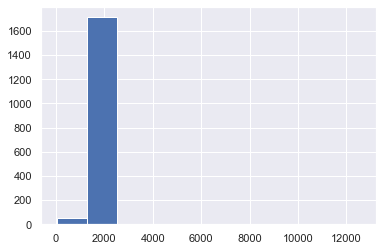

In [31]:
plt.hist(data['Crying seconds']);

In [29]:
data['Crying seconds']=data['Crying seconds'].fillna(data['Crying seconds'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


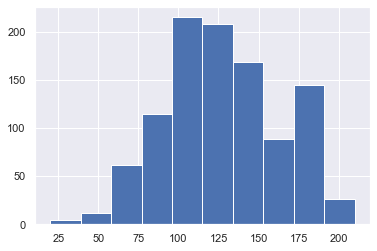

In [32]:
plt.hist(data['Bottle amount']);

In [33]:
data['Bottle amount']=data['Bottle amount'].fillna(data['Bottle amount'].mean())

(array([336., 251., 194.,  82.,  35.,  24.,  23.,  37.,   8.,   6.]),
 array([  114.4925 ,  4603.04325,  9091.594  , 13580.14475, 18068.6955 ,
        22557.24625, 27045.797  , 31534.34775, 36022.8985 , 40511.44925,
        45000.     ]),
 <a list of 10 Patch objects>)

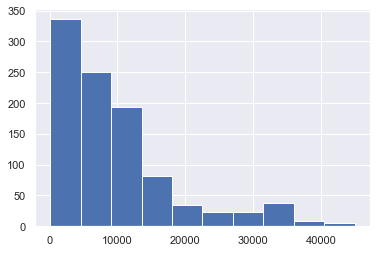

In [34]:
plt.hist(data['SleepingSecond'])

In [35]:
data['SleepingSecond']=data['SleepingSecond'].fillna(data['SleepingSecond'].mode()[0])

(array([ 7., 22., 17.,  4.,  4.,  1.,  1.,  2.,  2.,  1.]),
 array([  0.,  19.,  38.,  57.,  76.,  95., 114., 133., 152., 171., 190.]),
 <a list of 10 Patch objects>)

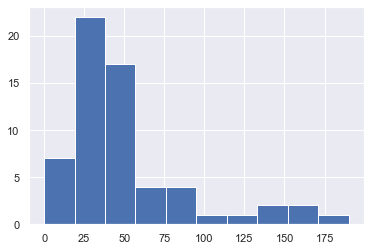

In [36]:
plt.hist(data['Pumping Left'])

In [37]:
data['Pumping Left']=data['Pumping Left'].fillna(data['Pumping Left'].mean())

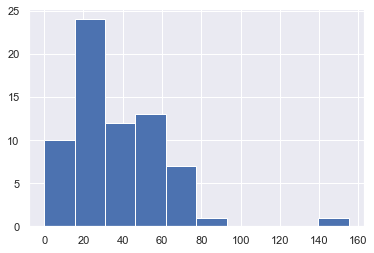

In [38]:
plt.hist(data['PumpingRight']);

In [39]:
data['PumpingRight']=data['PumpingRight'].fillna(data['PumpingRight'].mean())

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 15 columns):
BabyId                                1773 non-null object
FirsttimeParent                       1773 non-null int64
Crying date                           1773 non-null datetime64[ns]
Crying time                           1773 non-null object
Crying seconds                        1773 non-null float64
Feeding date                          1773 non-null datetime64[ns]
Feeding time                          1773 non-null object
Bottle amount                         1773 non-null float64
PumpingDate                           1773 non-null datetime64[ns]
PumpingTimePumpingLeftPumpingRight    1773 non-null object
Pumping Left                          1773 non-null float64
PumpingRight                          1773 non-null float64
SleepingDate                          1773 non-null datetime64[ns]
SleepingTime                          1773 non-null object
SleepingSecond                  

so we have filled the null values now

Find the overall statistical information of the dataset.

In [41]:
data.describe()

,FirsttimeParent,Crying seconds,Bottle amount,Pumping Left,PumpingRight,SleepingSecond
count,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000
mean,0.840948,1457.206747,127.203065,48.360656,38.014706,6348.192860
std,0.365828,415.045241,28.047172,7.838885,4.937932,7744.283932
min,0.000000,25.000000,20.000000,0.000000,0.000000,114.492500
25%,1.000000,1457.206747,120.000000,48.360656,38.014706,1800.000000
50%,1.000000,1457.206747,127.203065,48.360656,38.014706,1800.000000
75%,1.000000,1457.206747,130.000000,48.360656,38.014706,8953.940000
max,1.000000,12600.000000,210.000000,190.000000,155.000000,45000.000000


Find the correlation between Crying seconds of babies, sleeping
seconds

In [46]:
data['Crying seconds'].corr(data['SleepingSecond']) #we can plot the corelation using heatmap also 

0.000698017866015974

Take any 2 babies’ data as a subset. Check whether that subset is deviating from the entire dataset. If it is deviating remove it from the dataframe

In [68]:
sub_data=data[data.BabyId.isin(['HPT2_NR_30','HPT2_NR_31'])]

In [69]:
sub_data.describe()

,FirsttimeParent,Crying seconds,Bottle amount,Pumping Left,PumpingRight,SleepingSecond
count,368.000000,368.000000,368.000000,3.680000e+02,3.680000e+02,368.000000
mean,0.459239,1530.014007,111.154891,4.836066e+01,3.801471e+01,6653.559783
std,0.499014,586.695362,24.281735,1.423020e-13,1.778775e-13,9299.740456
min,0.000000,900.000000,25.000000,4.836066e+01,3.801471e+01,221.000000
25%,0.000000,1457.206747,100.000000,4.836066e+01,3.801471e+01,1800.000000
50%,0.000000,1457.206747,110.000000,4.836066e+01,3.801471e+01,1800.000000
75%,1.000000,1457.206747,130.000000,4.836066e+01,3.801471e+01,7458.000000
max,1.000000,8040.000000,200.000000,4.836066e+01,3.801471e+01,43200.000000


In [70]:
data.describe()

,FirsttimeParent,Crying seconds,Bottle amount,Pumping Left,PumpingRight,SleepingSecond
count,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000
mean,0.840948,1457.206747,127.203065,48.360656,38.014706,6348.192860
std,0.365828,415.045241,28.047172,7.838885,4.937932,7744.283932
min,0.000000,25.000000,20.000000,0.000000,0.000000,114.492500
25%,1.000000,1457.206747,120.000000,48.360656,38.014706,1800.000000
50%,1.000000,1457.206747,127.203065,48.360656,38.014706,1800.000000
75%,1.000000,1457.206747,130.000000,48.360656,38.014706,8953.940000
max,1.000000,12600.000000,210.000000,190.000000,155.000000,45000.000000


## Data Analysis & Visualization

Take 5 babies into consideration and draw a bar chart to know
crying data on different days

In [72]:
baby1=data[data.BabyId=='HPT2_NR_16']

[Text(0, 0, '2015-08-05T00:00:00.000000000'),
 Text(0, 0, '2015-08-06T00:00:00.000000000'),
 Text(0, 0, '2015-08-07T00:00:00.000000000'),
 Text(0, 0, '2015-08-08T00:00:00.000000000'),
 Text(0, 0, '2015-08-09T00:00:00.000000000'),
 Text(0, 0, '2015-08-10T00:00:00.000000000'),
 Text(0, 0, '2015-08-11T00:00:00.000000000'),
 Text(0, 0, '2015-08-12T00:00:00.000000000'),
 Text(0, 0, '2015-08-13T00:00:00.000000000'),
 Text(0, 0, '2015-08-14T00:00:00.000000000'),
 Text(0, 0, '2015-08-15T00:00:00.000000000'),
 Text(0, 0, '2015-08-16T00:00:00.000000000'),
 Text(0, 0, '2015-08-17T00:00:00.000000000'),
 Text(0, 0, '2015-08-18T00:00:00.000000000'),
 Text(0, 0, '2015-08-19T00:00:00.000000000'),
 Text(0, 0, '2015-08-20T00:00:00.000000000'),
 Text(0, 0, '2015-08-21T00:00:00.000000000')]

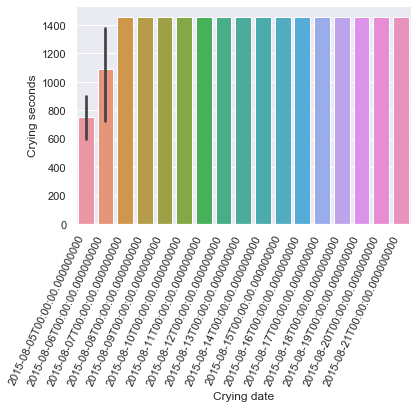

In [82]:
chart=sns.barplot(x='Crying date',y='Crying seconds',data=baby1)
chart.set_xticklabels(chart.get_xticklabels(),rotation=65, horizontalalignment='right')

In [85]:
baby2=data[data.BabyId=='HPT2_NR_24']

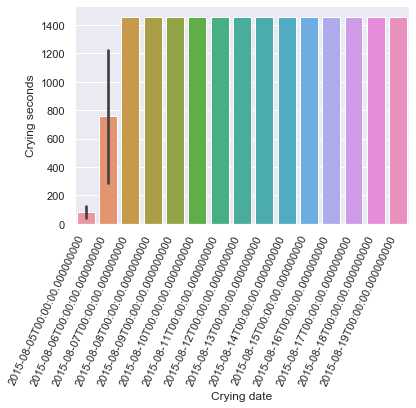

In [89]:
chart=sns.barplot(x='Crying date',y='Crying seconds',data=baby2)
chart.set_xticklabels(chart.get_xticklabels(),rotation=65, horizontalalignment='right');

In [91]:
baby3=data[data.BabyId=='HPT2_NR_33']

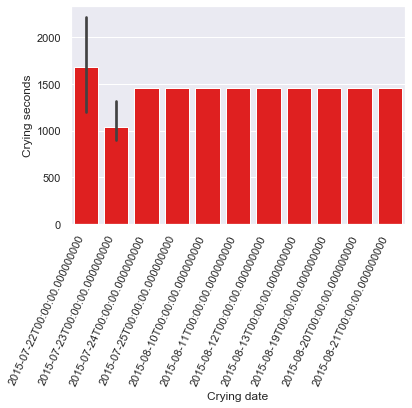

In [110]:
chart=sns.barplot(x='Crying date',y='Crying seconds',data=baby3,color='red')
chart.set_xticklabels(chart.get_xticklabels(),rotation=65, horizontalalignment='right');

In [96]:
baby4=data[data.BabyId=='HPT2_NR_24']

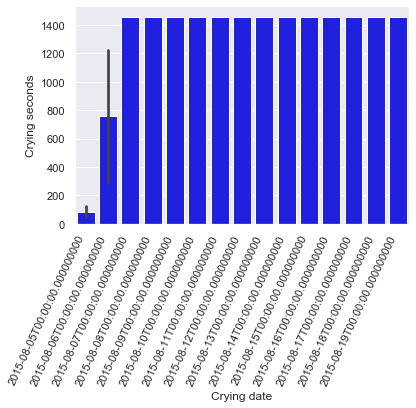

In [111]:
chart=sns.barplot(x='Crying date',y='Crying seconds',data=baby4,color='blue')
chart.set_xticklabels(chart.get_xticklabels(),rotation=65, horizontalalignment='right');

In [105]:
baby5=data[data.BabyId=='HPT2_NR_18']

[Text(0, 0, '2015-08-05T00:00:00.000000000'),
 Text(0, 0, '2015-08-06T00:00:00.000000000'),
 Text(0, 0, '2015-08-07T00:00:00.000000000'),
 Text(0, 0, '2015-08-08T00:00:00.000000000'),
 Text(0, 0, '2015-08-09T00:00:00.000000000'),
 Text(0, 0, '2015-08-10T00:00:00.000000000'),
 Text(0, 0, '2015-08-11T00:00:00.000000000'),
 Text(0, 0, '2015-08-12T00:00:00.000000000'),
 Text(0, 0, '2015-08-13T00:00:00.000000000'),
 Text(0, 0, '2015-08-14T00:00:00.000000000'),
 Text(0, 0, '2015-08-15T00:00:00.000000000'),
 Text(0, 0, '2015-08-16T00:00:00.000000000'),
 Text(0, 0, '2015-08-17T00:00:00.000000000'),
 Text(0, 0, '2015-08-18T00:00:00.000000000'),
 Text(0, 0, '2015-08-19T00:00:00.000000000'),
 Text(0, 0, '2015-08-20T00:00:00.000000000')]

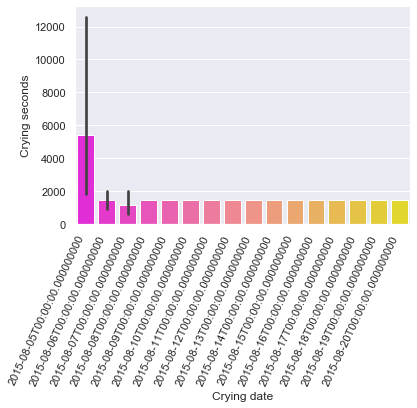

In [108]:
chart=sns.barplot(x='Crying date',y='Crying seconds',data=baby5,palette='spring')
chart.set_xticklabels(chart.get_xticklabels(),rotation=65,horizontalalignment='right')

Consider Pumping data (Pumping left, Pumping right column) and
feeding data(Bottle amount column). Draw Bar chart to find out any
relationship between them by taking any 4 babies.

<Figure size 720x360 with 0 Axes>

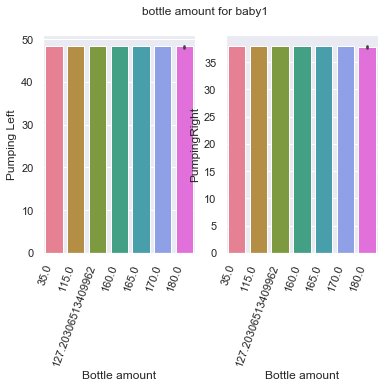

In [174]:
plt.figure(figsize=(10,5))
f, axes = plt.subplots(1, 2)
chart=sns.barplot(x='Bottle amount',y='Pumping Left',data=baby1,palette='husl' ,ax=axes[0])
chart.set_xticklabels(chart.get_xticklabels(),rotation=70,horizontalalignment='right');

chart=sns.barplot(x='Bottle amount',y='PumpingRight',data=baby1,palette='husl', ax=axes[1])
chart.set_xticklabels(chart.get_xticklabels(),rotation=70,horizontalalignment='right');
f.suptitle('bottle amount for baby1');

Text(0.5, 0.98, 'bottle amount for baby2')

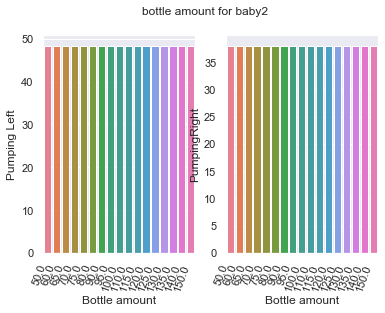

<Figure size 720x360 with 0 Axes>

In [170]:
f, axes = plt.subplots(1, 2)
plt.figure(figsize=(10,5))
chart=sns.barplot(x='Bottle amount',y='Pumping Left',data=baby2,palette='husl' ,ax=axes[0])
chart.set_xticklabels(chart.get_xticklabels(),rotation=70,horizontalalignment='right');

chart=sns.barplot(x='Bottle amount',y='PumpingRight',data=baby2,palette='husl', ax=axes[1])
chart.set_xticklabels(chart.get_xticklabels(),rotation=70,horizontalalignment='right');
f.suptitle('bottle amount for baby2')

Text(0.5, 0.98, 'bottle amount for baby4')

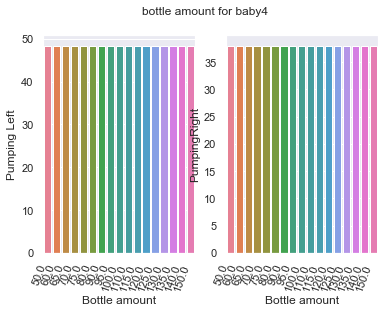

<Figure size 720x360 with 0 Axes>

In [176]:
f, axes = plt.subplots(1, 2)
plt.figure(figsize=(10,5))
chart=sns.barplot(x='Bottle amount',y='Pumping Left',data=baby4,palette='husl' ,ax=axes[0])
chart.set_xticklabels(chart.get_xticklabels(),rotation=70,horizontalalignment='right');

chart=sns.barplot(x='Bottle amount',y='PumpingRight',data=baby4,palette='husl', ax=axes[1])
chart.set_xticklabels(chart.get_xticklabels(),rotation=70,horizontalalignment='right');
f.suptitle('bottle amount for baby4')

So, Most of values are filled with the mean value so there is no observerable variation in barplots

Find outliers by drawing a Scatter plot. If there are any, remove it
from the dataframe

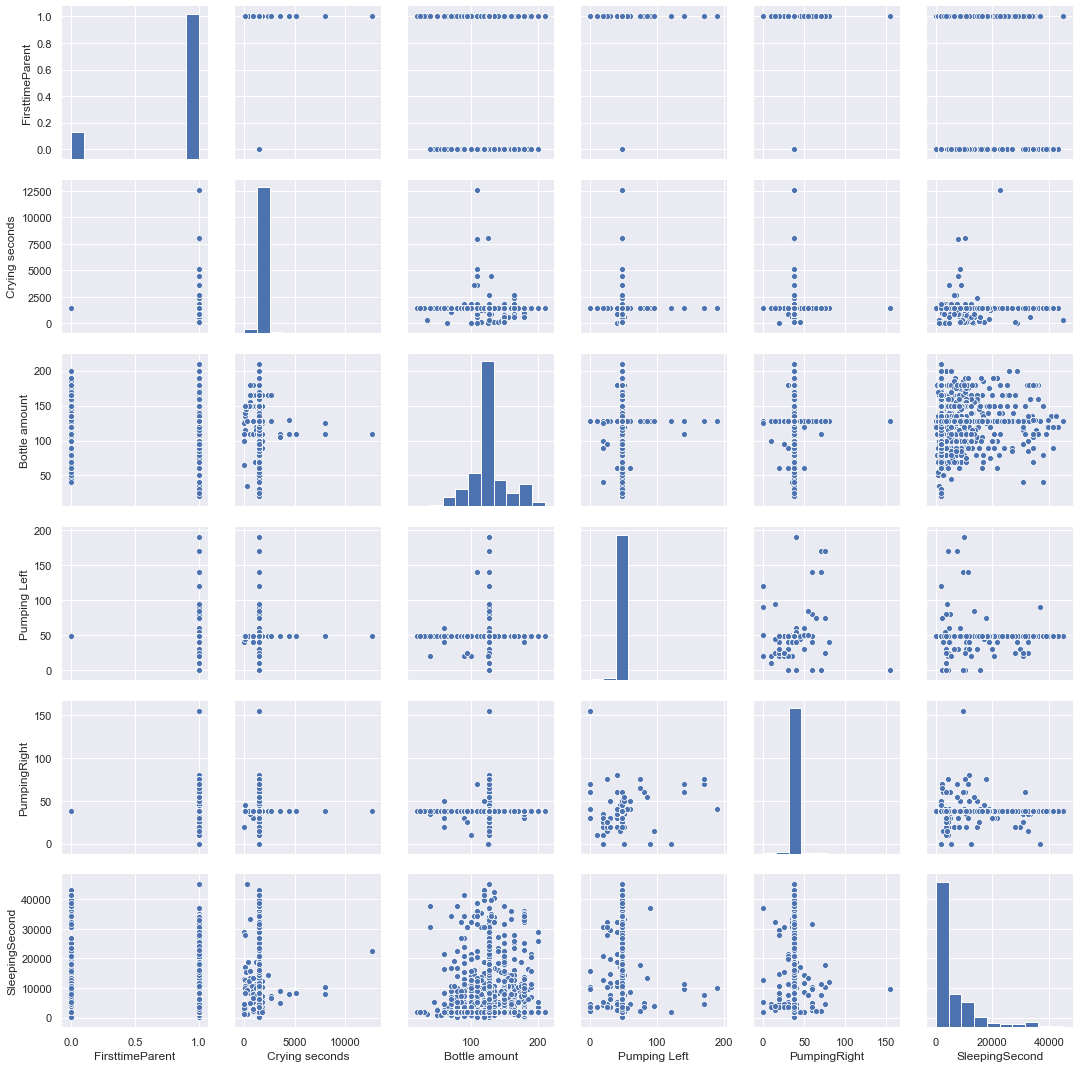

In [133]:
sns.pairplot(data)

Find out the following findings from the data
1. Find out which baby has cried the most and least.
2. Find out which baby has drunk the most amount of milk and which
baby the least.

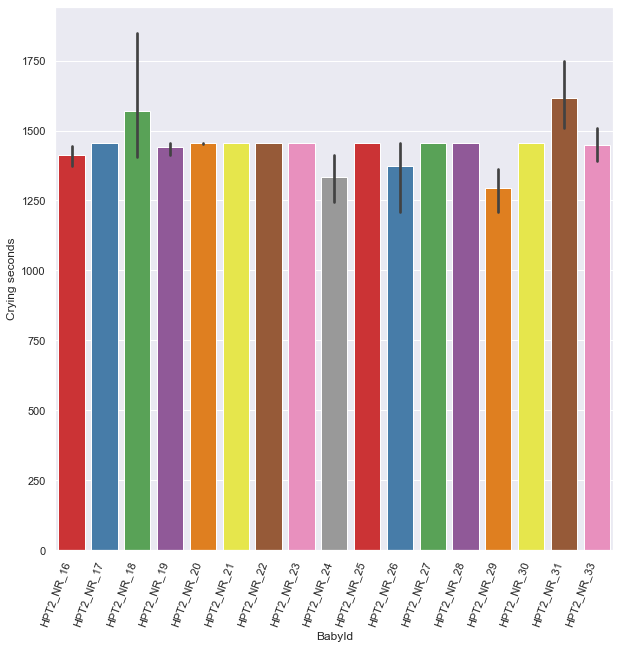

In [129]:
plt.figure(figsize=(10,10))
chart=sns.barplot(x='BabyId',y='Crying seconds',data=data[['BabyId','Crying seconds']],palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(),rotation=70,horizontalalignment='right');

So HPT2_NR_18 has cried the most
whereas HPT2_NR_29 has cried least


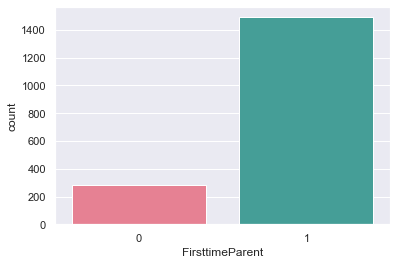

In [131]:
chart=sns.countplot(x='FirsttimeParent',data=data,palette='husl')


In [132]:
data.FirsttimeParent.value_counts()

1    1491
0     282
Name: FirsttimeParent, dtype: int64

In [ ]:
# so there is 1491 first time parents